### Problem Description:

Our project focuses on categorizing posts on Reddit into specific subreddits in popular categories such as movies, food, technology, news, etc. With numerous active users and various subreddits covering diverse topics, discovering communities that align with individual interests can be challenging. To address this issue, we aim to develop a text classification model that can predict the relevant subreddit of a post based on its title and description, provide suggestions to the users, and provide insights to the moderators.

Our project is interesting for several reasons. Firstly, it tackles a prevalent real-world issue encountered by many Reddit users: the difficulty of finding subreddits that match their interests. Furthermore, it has the potential to assist moderators in identifying irrelevant posts and detecting potential spammers within specific subreddits.


In [1]:
import pandas as pd
import warnings
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# To ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("reddit_posts.csv")

In [3]:
df.head(5)

title subreddit  \
0  ‘The film industry is gone. It sucks’: Jim Jar...    movies   
1  Movie recommendations for something similar to...    movies   
2                    Is this a plot hole in Arrival?    movies   
3  James Cameron is a franchise in himself but re...    movies   
4           Ranking Stuff #4: TSPDT Top 10 Directors    movies   

              author  created_utc  \
0         quellerand   1682275605   
1         duckgoose7   1682273034   
2     Iambikecurious   1682272415   
3          Alibotify   1682272319   
4  logicalfallacy234   1682271719   

                                           permalink  score  ups  downs  \
0  https://www.reddit.com/r/movies/comments/12wlp...      1    1      0   
1  https://www.reddit.com/r/movies/comments/12wka...      0    0      0   
2  https://www.reddit.com/r/movies/comments/12wjx...      0    0      0   
3  https://www.reddit.com/r/movies/comments/12wjv...      0    0      0   
4  https://www.reddit.com/r/movies/comments/12wjj...      0    0      0   

   num_comments                                           selftext  \
0             0                                                NaN   
1             3  I don't often get super sucked into movies, as...   
2            14  Just watched Arrival for the first time yester...   
3            12  He reuses designs and actors etc. but these sm...   
4             9  Here's another edition of ranking stuff in mov...   

                                                 url  
0  https://www.theguardian.com/film/2023/apr/22/j...  
1  https://www.reddit.com/r/movies/comments/12wka...  
2  https://www.reddit.com/r/movies/comments/12wjx...  
3  https://www.reddit.com/r/movies/comments/12wjv...  
4  https://www.reddit.com/r/movies/comments/12wjj...

### Data Exploration

In [4]:
# Data Exploration
print(df['subreddit'].value_counts())

subreddit
others        2503
gaming        2502
music         2501
movies        2500
sports        2500
worldnews     2500
technology    2500
science       2500
books         2500
food          2500
Name: count, dtype: int64


In [5]:
# Check for Missing Values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
title               0
subreddit           0
author              0
created_utc         0
permalink           0
score               0
ups                 0
downs               0
num_comments        0
selftext        18491
url                 0
dtype: int64


In [6]:
# Check for Duplicates
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [title, subreddit, author, created_utc, permalink, score, ups, downs, num_comments, selftext, url]
Index: []


In [7]:
#pip install pandas numpy beautifulsoup4 nltk

In [8]:
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [9]:
data = df

In [10]:
# replace nan with empty strings
data['selftext'] = data['selftext'].fillna('')

In [50]:
import pandas as pd
import plotly.express as px

def word_count(text):
    words = text.split()
    return len(words)

# Calculate the average word count for each column
df['Avg_Word_Count_Title'] = df['title'].apply(word_count)
df['Avg_Word_Count_Description'] = df['selftext'].apply(word_count)


# Create a bar plot using Plotly
fig = px.bar(
    df,
    x=['Title', 'Description'],
    y=[df['Avg_Word_Count_Title'].mean(),df['Avg_Word_Count_Description'].mean()],
    labels={'x': 'Columns', 'y': 'Avg_Word_Count'},
    title='Average Word Count in Title and Description Columns',
    text=[df['Avg_Word_Count_Title'].mean(),df['Avg_Word_Count_Description'].mean()],
)

fig.update_layout(showlegend=True)
# Show the plot
fig.show()


/Users/rakeshkaranam/anaconda3/lib/python3.10/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/rakeshkaranam/anaconda3/lib/python3.10/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [59]:
# Calculate the top author for each subreddit
top_authors = df.groupby('subreddit')['author'].agg(lambda x: x.value_counts().index[0]).reset_index()
top_authors.columns = ['subreddit', 'TopAuthor']

# Create a bar chart using Plotly
fig = px.bar(top_authors, x='subreddit', y='TopAuthor', title='Top Authors of Each Subreddit')

# Customize the appearance of the chart if needed
fig.update_layout(xaxis_title='Subreddit', yaxis_title='Top Author')

# Show the chart
fig.show()

/Users/rakeshkaranam/anaconda3/lib/python3.10/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/rakeshkaranam/anaconda3/lib/python3.10/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



### Data Preprocessing

In [11]:
#merge title and description columns
data['title_description'] = data['title'] +' '+ data['selftext']

# Case-Folding (Lowercasing)
data['title_description'] = data['title_description'].str.lower()
print("After Lowercasing:")
print(data['title_description'].head())

After Lowercasing:
0    ‘the film industry is gone. it sucks’: jim jar...
1    movie recommendations for something similar to...
2    is this a plot hole in arrival? just watched a...
3    james cameron is a franchise in himself but re...
4    ranking stuff #4: tspdt top 10 directors here'...
Name: title_description, dtype: object


In [12]:
# Remove numbers and punctuation from the 'text_column'
df['title_description'] = df['title_description'].str.replace(r'[^a-zA-Z\s]', '', regex=True)

In [13]:
# Tokenization
nltk.download('punkt')
data['tokens'] = data['title_description'].apply(lambda x: word_tokenize(x))
print("\nAfter Tokenization:")
print(data['tokens'].head())

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rakeshkaranam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



After Tokenization:
0    [the, film, industry, is, gone, it, sucks, jim...
1    [movie, recommendations, for, something, simil...
2    [is, this, a, plot, hole, in, arrival, just, w...
3    [james, cameron, is, a, franchise, in, himself...
4    [ranking, stuff, tspdt, top, directors, heres,...
Name: tokens, dtype: object


In [14]:
# Stopword Removal
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
data['tokens'] = data['tokens'].apply(lambda x: [word for word in x if word not in stop_words])
print("\nAfter Stopword Removal:")
print(data['tokens'].head())


After Stopword Removal:
0    [film, industry, gone, sucks, jim, jarmusch, s...
1    [movie, recommendations, something, similar, n...
2    [plot, hole, arrival, watched, arrival, first,...
3    [james, cameron, franchise, refuses, put, smal...
4    [ranking, stuff, tspdt, top, directors, heres,...
Name: tokens, dtype: object


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rakeshkaranam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
from nltk.corpus import wordnet

##This is a common method which is widely used across the NLP community of practitioners and readers

def get_part_of_speech_tags(token):
    
    """Maps POS tags to first character lemmatize() accepts.
    We are focussing on Verbs, Nouns, Adjectives and Adverbs here."""

    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    
    tag = nltk.pos_tag([token])[0][1][0].upper()
    
    return tag_dict.get(tag, wordnet.NOUN)


# Lemmatization
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
data['tokens'] = data['tokens'].apply(lambda x: [lemmatizer.lemmatize(word, get_part_of_speech_tags(word) ) for word in x])
print("\nAfter Lemmatization:")
print(data['tokens'].head())

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rakeshkaranam/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



After Lemmatization:
0    [film, industry, go, suck, jim, jarmusch, swap...
1    [movie, recommendation, something, similar, ne...
2    [plot, hole, arrival, watch, arrival, first, t...
3    [james, cameron, franchise, refuse, put, small...
4    [rank, stuff, tspdt, top, director, here, anot...
Name: tokens, dtype: object


In [16]:
data.head()

title subreddit  \
0  ‘The film industry is gone. It sucks’: Jim Jar...    movies   
1  Movie recommendations for something similar to...    movies   
2                    Is this a plot hole in Arrival?    movies   
3  James Cameron is a franchise in himself but re...    movies   
4           Ranking Stuff #4: TSPDT Top 10 Directors    movies   

              author  created_utc  \
0         quellerand   1682275605   
1         duckgoose7   1682273034   
2     Iambikecurious   1682272415   
3          Alibotify   1682272319   
4  logicalfallacy234   1682271719   

                                           permalink  score  ups  downs  \
0  https://www.reddit.com/r/movies/comments/12wlp...      1    1      0   
1  https://www.reddit.com/r/movies/comments/12wka...      0    0      0   
2  https://www.reddit.com/r/movies/comments/12wjx...      0    0      0   
3  https://www.reddit.com/r/movies/comments/12wjv...      0    0      0   
4  https://www.reddit.com/r/movies/comments/12wjj...      0    0      0   

   num_comments                                           selftext  \
0             0                                                      
1             3  I don't often get super sucked into movies, as...   
2            14  Just watched Arrival for the first time yester...   
3            12  He reuses designs and actors etc. but these sm...   
4             9  Here's another edition of ranking stuff in mov...   

                                                 url  \
0  https://www.theguardian.com/film/2023/apr/22/j...   
1  https://www.reddit.com/r/movies/comments/12wka...   
2  https://www.reddit.com/r/movies/comments/12wjx...   
3  https://www.reddit.com/r/movies/comments/12wjv...   
4  https://www.reddit.com/r/movies/comments/12wjj...   

                                   title_description  \
0  the film industry is gone it sucks jim jarmusc...   
1  movie recommendations for something similar to...   
2  is this a plot hole in arrival just watched ar...   
3  james cameron is a franchise in himself but re...   
4  ranking stuff  tspdt top  directors heres anot...   

                                              tokens  
0  [film, industry, go, suck, jim, jarmusch, swap...  
1  [movie, recommendation, something, similar, ne...  
2  [plot, hole, arrival, watch, arrival, first, t...  
3  [james, cameron, franchise, refuse, put, small...  
4  [rank, stuff, tspdt, top, director, here, anot...

In [24]:
data['tokens'] = data['tokens'].apply(lambda x: " ".join(x))
data['tokens']

0        film industry go suck jim jarmusch swap direct...
1        movie recommendation something similar never l...
2        plot hole arrival watch arrival first time yes...
3        james cameron franchise refuse put small easte...
4        rank stuff tspdt top director here another edi...
                               ...                        
25001    believe unreleased marvin gaye track son marvi...
25002    believe unreleased marvin gaye track son marvi...
25003    believe unreleased marvin gaye track son marvi...
25004    believe unreleased marvin gaye track son marvi...
25005    song good vocabulary word listen west la fadea...
Name: tokens, Length: 25006, dtype: object

In [25]:
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from matplotlib import pyplot as plt

def draw_word_cloud(text, subreddit):
    # Combine all the texts into a single string
    combined_text = " ".join(text)    
    wordcloud = WordCloud(background_color="white", contour_width=3, contour_color='steelblue').generate(combined_text)
    # Visualize the word cloud
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(f"Word cloud for the subreddit - {subreddit}", fontsize=16)
    plt.show()

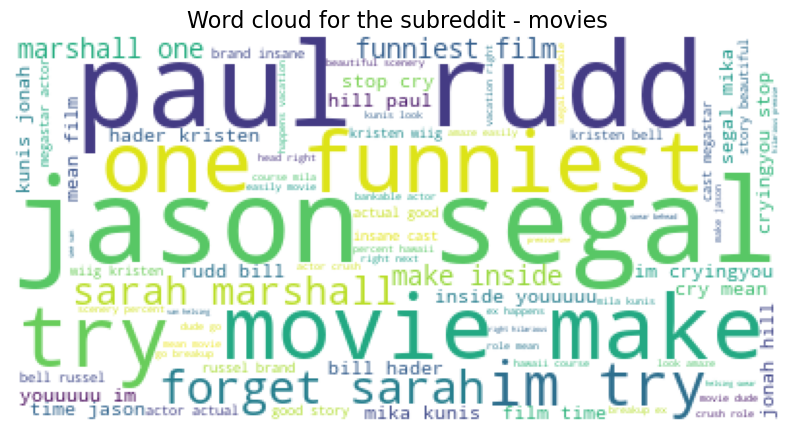

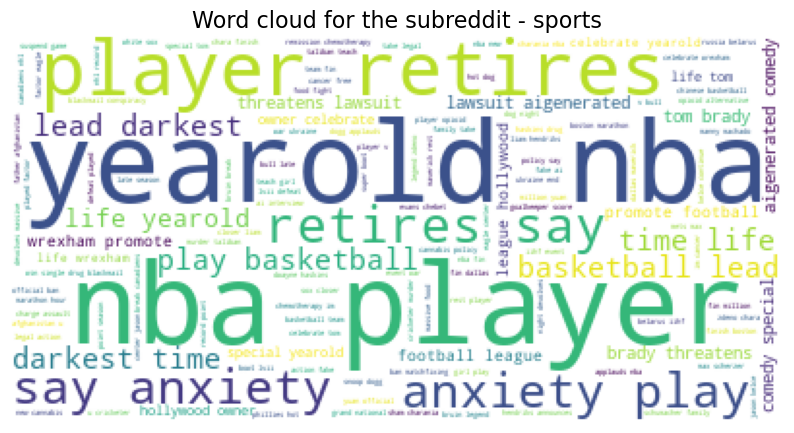

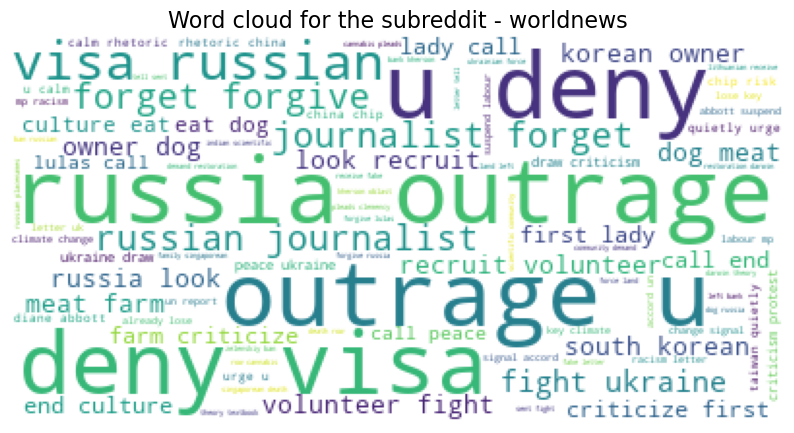

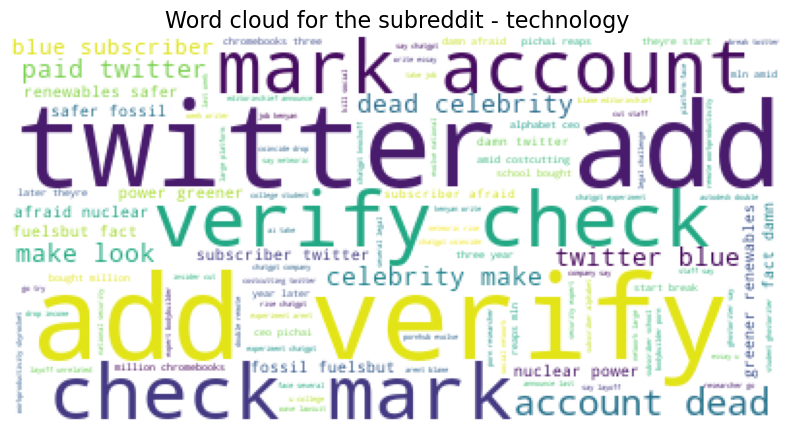

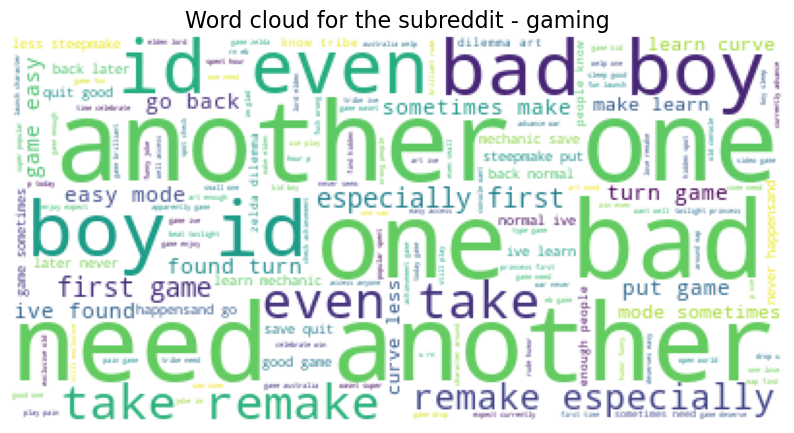

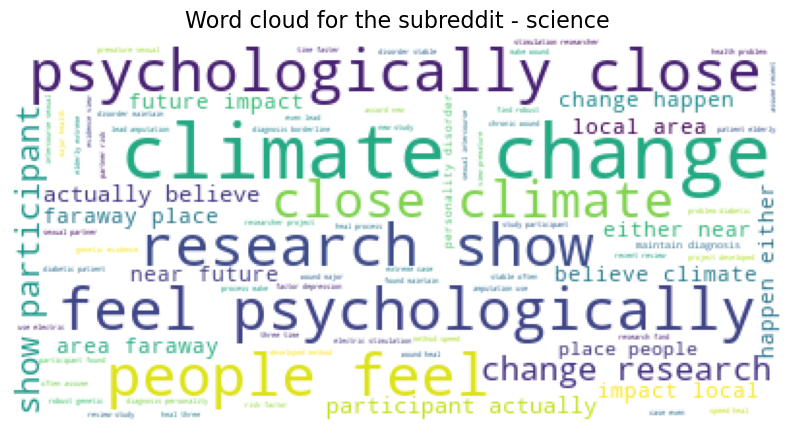

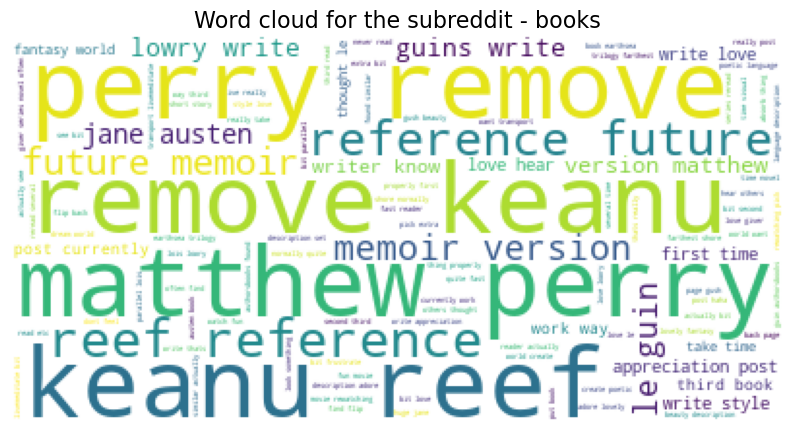

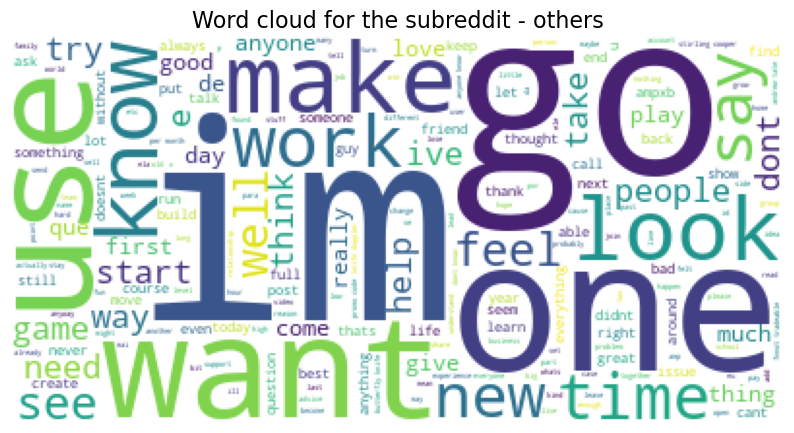

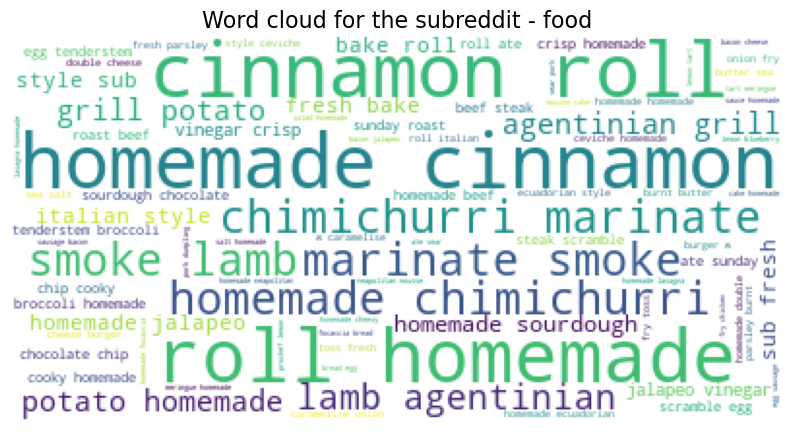

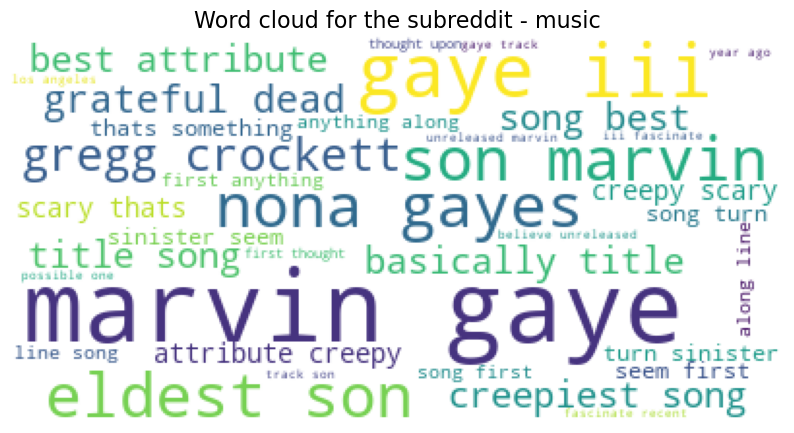

In [26]:
for subreddit in data["subreddit"].unique():
    temp_df = data[data["subreddit"]==subreddit]
    draw_word_cloud(temp_df["tokens"].to_list(),subreddit)

### Feature Extraction

In [27]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
label_encoder = LabelEncoder()

# Fit and transform the data to encode the labels
encoded_data = label_encoder.fit_transform(data['subreddit'])
data['label'] = encoded_data

In [28]:
X = data['tokens'] # extract column with title and description
y = data['subreddit']  # extract column with subreddit

In [29]:
# tokenize the text and convert data in matrix format
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_vec = vectorizer.fit_transform(X)
X_vec

<25006x16362 sparse matrix of type '<class 'numpy.int64'>'
	with 487875 stored elements in Compressed Sparse Row format>

In [30]:
# Transform data by applying term frequency inverse document frequency (TF-IDF) 
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer() #by default applies "l2" normalization
X_tfidf = tfidf.fit_transform(X_vec)
X_tfidf = X_tfidf.todense()
X_tfidf = np.asarray(X_tfidf)
X_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
# Extract the body and labels for training the classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, 
                                                    test_size = 0.2, random_state = 0)

In [32]:
# Helper function to evaluate a model by printing its accuracy on train set, test set, confusion matrix, ROC curve
# This function can be resued for all the models
from sklearn.metrics import classification_report
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Make predictions on the training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate accuracy on the training and test sets
    train_accuracy = np.mean(y_train_pred == y_train)
    test_accuracy = np.mean(y_test_pred == y_test)

    print('***************************************************************')

    # Print the accuracy scores
    print("Train accuracy:", train_accuracy)
    print()
    print("Test accuracy:", test_accuracy)

    print('***************************************************************')
    # Print the classification report
    print("Classification report:")
    print()
    print(classification_report(y_test, y_test_pred))
    
    print('***************************************************************')

    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    #plt.xticks(labels)
    #plt.yticks(labels)
    # Print the values inside the plot
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')
    plt.show()
    plt.show()

### Model Building and Evaluation

***************************************************************
Train accuracy: 0.9826034793041392

Test accuracy: 0.9648140743702519
***************************************************************
Classification report:

              precision    recall  f1-score   support

       books       0.95      1.00      0.97       484
        food       0.96      1.00      0.98       525
      gaming       0.96      0.97      0.97       501
      movies       0.97      0.98      0.98       504
       music       0.97      0.98      0.97       484
      others       0.94      0.75      0.83       485
     science       0.99      0.99      0.99       516
      sports       0.97      0.99      0.98       478
  technology       0.96      0.99      0.98       493
   worldnews       0.97      0.99      0.98       532

    accuracy                           0.96      5002
   macro avg       0.96      0.96      0.96      5002
weighted avg       0.96      0.96      0.96      5002

*******************

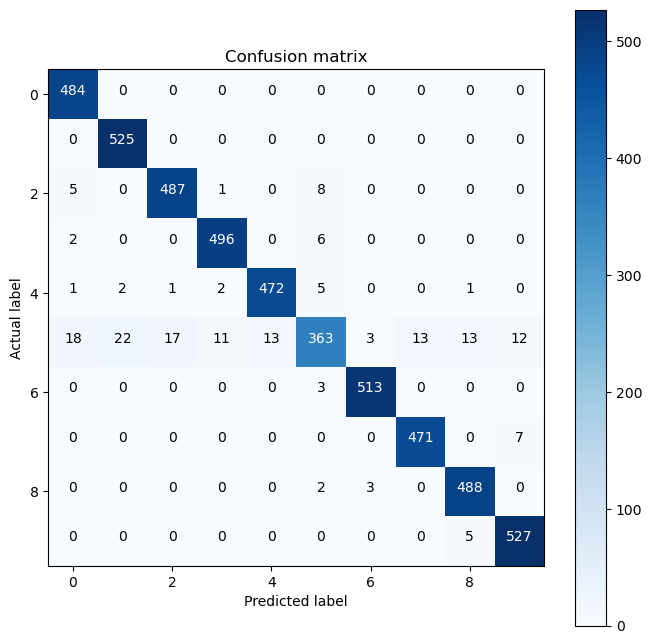

In [34]:
# Train the NB classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
# Predicting the Test set results
evaluate_model(clf, X_train, y_train, X_test, y_test)

***************************************************************
Train accuracy: 0.9999000199960008

Test accuracy: 0.9936025589764095
***************************************************************
Classification report:

              precision    recall  f1-score   support

       books       1.00      1.00      1.00       484
        food       1.00      1.00      1.00       525
      gaming       1.00      0.99      1.00       501
      movies       1.00      0.99      0.99       504
       music       0.99      0.98      0.99       484
      others       0.95      0.98      0.97       485
     science       1.00      1.00      1.00       516
      sports       1.00      1.00      1.00       478
  technology       1.00      1.00      1.00       493
   worldnews       1.00      0.99      0.99       532

    accuracy                           0.99      5002
   macro avg       0.99      0.99      0.99      5002
weighted avg       0.99      0.99      0.99      5002

*******************

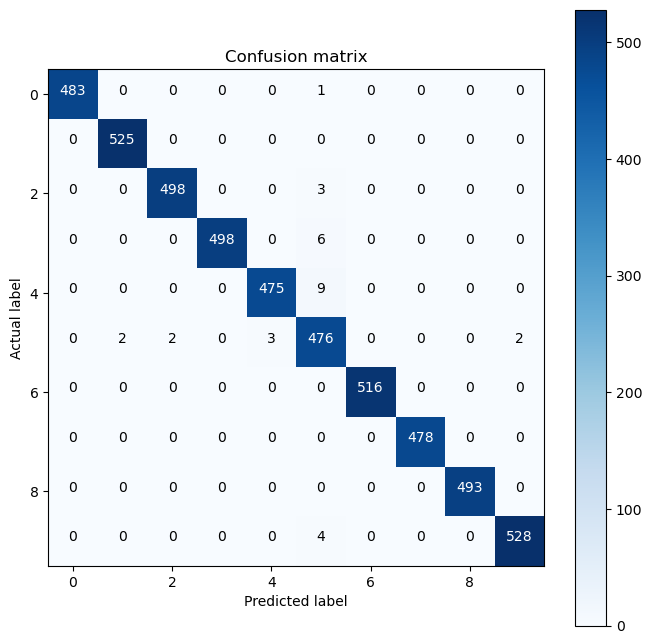

In [33]:
from sklearn import svm
svm_model = svm.SVC(C=10, kernel='linear')
svm_model.fit(X_train, y_train)
evaluate_model(svm_model, X_train, y_train, X_test, y_test)

***************************************************************
Train accuracy: 0.9091681663667267

Test accuracy: 0.9044382247101159
***************************************************************
Classification report:

              precision    recall  f1-score   support

       books       1.00      0.97      0.98       484
        food       1.00      1.00      1.00       525
      gaming       0.99      0.90      0.94       501
      movies       0.99      0.98      0.98       504
       music       0.98      0.92      0.95       484
      others       0.50      0.93      0.66       485
     science       0.99      0.88      0.94       516
      sports       1.00      0.81      0.90       478
  technology       0.99      0.79      0.88       493
   worldnews       1.00      0.86      0.92       532

    accuracy                           0.90      5002
   macro avg       0.94      0.90      0.91      5002
weighted avg       0.94      0.90      0.92      5002

*******************

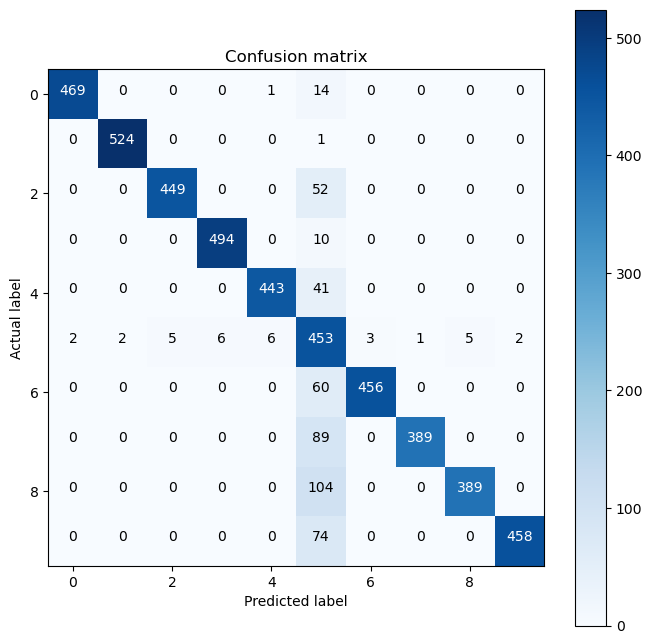

In [35]:
# Train the decision tree classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42,
    max_depth=70,           # Maximum depth of the tree
    max_features=None      # Number of features to consider when making a split (None means all)
)
clf.fit(X_train, y_train)
evaluate_model(clf, X_train, y_train, X_test, y_test)

***************************************************************
Train accuracy: 0.9457108578284343

Test accuracy: 0.9438224710115953
***************************************************************
Classification report:

              precision    recall  f1-score   support

       books       1.00      1.00      1.00       484
        food       0.99      1.00      1.00       525
      gaming       0.99      0.95      0.97       501
      movies       1.00      0.99      0.99       504
       music       1.00      0.94      0.97       484
      others       0.64      0.97      0.77       485
     science       1.00      0.93      0.96       516
      sports       1.00      0.88      0.94       478
  technology       1.00      0.86      0.92       493
   worldnews       0.99      0.93      0.96       532

    accuracy                           0.94      5002
   macro avg       0.96      0.94      0.95      5002
weighted avg       0.96      0.94      0.95      5002

*******************

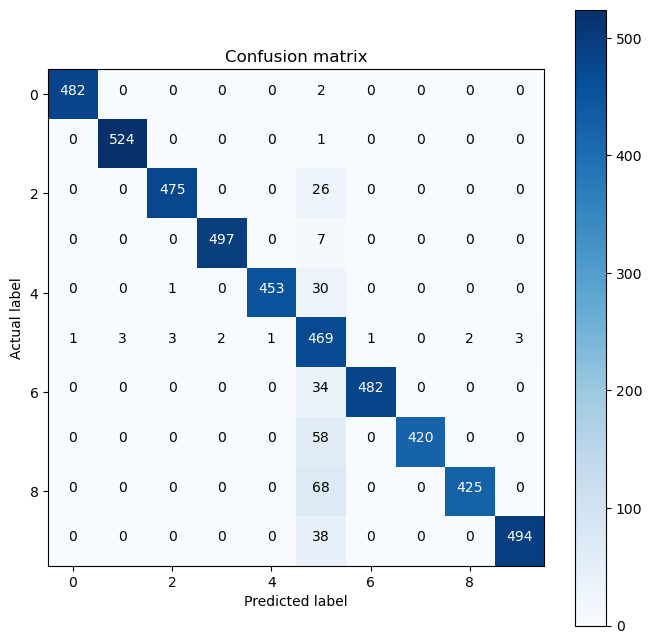

In [37]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest Classifier with hyperparameters
clf = RandomForestClassifier(
    n_estimators=70,     # Number of trees in the forest
    max_depth=90,        # Maximum depth of the trees (None means no limit)
    random_state=42        # Random seed for reproducibility
)

clf.fit(X_train, y_train)
evaluate_model(clf, X_train, y_train, X_test, y_test)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
params = { 'max_depth': [None],
           'n_estimators': [50, 90,None]
          }

rf_model_ = RandomForestClassifier()

clf = GridSearchCV(estimator=rf_model_, 
                   param_grid=params,
                   verbose=3)
clf.fit(X_tfidf, y)
print("Best parameters:", clf.best_params_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ...max_depth=None, n_estimators=50;, score=0.884 total time=  46.9s
[CV 2/5] END ...max_depth=None, n_estimators=50;, score=0.994 total time=  50.3s
[CV 3/5] END ...max_depth=None, n_estimators=50;, score=0.996 total time=  55.0s
[CV 4/5] END ...max_depth=None, n_estimators=50;, score=0.992 total time=  55.3s
[CV 5/5] END ...max_depth=None, n_estimators=50;, score=0.993 total time=  56.2s
[CV 1/5] END ...max_depth=None, n_estimators=90;, score=0.897 total time= 1.3min
[CV 2/5] END ...max_depth=None, n_estimators=90;, score=0.994 total time= 1.5min
[CV 3/5] END ...max_depth=None, n_estimators=90;, score=0.994 total time= 1.6min
[CV 4/5] END ...max_depth=None, n_estimators=90;, score=0.993 total time= 1.6min
[CV 5/5] END ...max_depth=None, n_estimators=90;, score=0.996 total time= 1.7min
Best parameters: {'max_depth': None, 'n_estimators': 90}


***************************************************************
Train accuracy: 0.9999000199960008

Test accuracy: 1.0
***************************************************************
Classification report:

              precision    recall  f1-score   support

       books       1.00      1.00      1.00       484
        food       1.00      1.00      1.00       525
      gaming       1.00      1.00      1.00       501
      movies       1.00      1.00      1.00       504
       music       1.00      1.00      1.00       484
      others       1.00      1.00      1.00       485
     science       1.00      1.00      1.00       516
      sports       1.00      1.00      1.00       478
  technology       1.00      1.00      1.00       493
   worldnews       1.00      1.00      1.00       532

    accuracy                           1.00      5002
   macro avg       1.00      1.00      1.00      5002
weighted avg       1.00      1.00      1.00      5002

**********************************

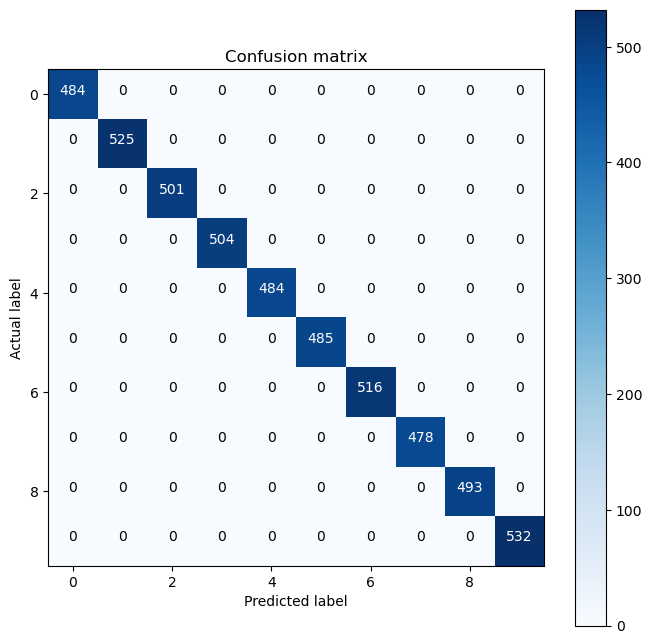

In [44]:
#clf.fit(X_tfidf, y)
evaluate_model(clf, X_train, y_train, X_test, y_test)

In [45]:
all_models = {
 'SVM' : 99.15,
 'DecisionTree': 90.44,
 'RandomForest': 94.38,
 'NaiveBayes': 96.44,
 'RandomForest_FineTuned': 99.36}

In [46]:
import plotly.express as px
#fig = px.line(x=all_models.keys(),y=all_models.values(),title='All Models Comparison',text=all_models.values(),labels=dict(x="Model", y="Accuracy"))
fig = px.bar(x=all_models.keys(),y=all_models.values(),title='All Models Comparison',text=all_models.values(),labels=dict(x="Model", y="Accuracy"),color=all_models.keys())
#fig.update_traces(textposition="bottom right")
fig.update_yaxes(range=[85, 100])
fig.show()

### Topic Modelling 

In [47]:
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.models import TfidfModel


def text_to_words(texts):
    return [[word for word in simple_preprocess(str(text), deacc=True)]
            for text in texts]

text = data['tokens'].tolist()
text_words = text_to_words(text)

word_dict = corpora.Dictionary(text_words)
word_dict.filter_extremes(no_below=5, no_above=0.1, keep_n=2000)
# Create Corpus
texts = text_words
# Term Count Frequency
corpus_vec = [word_dict.doc2bow(text) for text in texts]

# Train the LDA model
lda_model = gensim.models.LdaModel(corpus=corpus_vec, id2word=word_dict, num_topics=10, iterations=20)

In [48]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

model = TfidfModel(corpus=corpus_vec, id2word=word_dict)  # fit model
corpus_tfidf = [model[c] for c in corpus_vec]  # apply model to corpus document

# Create an interactive visualization
lda_visualization = gensimvis.prepare(lda_model, corpus_vec, word_dict)
pyLDAvis.display(lda_visualization)